In [1]:
# Import the necessary libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [2]:
# Load the data set into a Pandas DataFrame
rainPredict = pd.read_csv('temp_prcp_jonesboro_2016-2017_selected.csv')

In [3]:
# Deal with the missing values
rainPredict = rainPredict.fillna(method = 'ffill')
rainPredict.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYStationPressure,HOURLYPrecip
0,WBAN:03953,JONESBORO MUNICIPAL AIRPORT AR US,79.9,35.83111,-90.64639,2016-01-01 00:53,FM-15,34.0,85.0,30.12,NONE
1,WBAN:03953,JONESBORO MUNICIPAL AIRPORT AR US,79.9,35.83111,-90.64639,2016-01-01 01:53,FM-15,34.0,82.0,30.13,NONE
2,WBAN:03953,JONESBORO MUNICIPAL AIRPORT AR US,79.9,35.83111,-90.64639,2016-01-01 02:53,FM-15,33.0,85.0,30.13,NONE
3,WBAN:03953,JONESBORO MUNICIPAL AIRPORT AR US,79.9,35.83111,-90.64639,2016-01-01 03:53,FM-15,32.0,92.0,30.15,NONE
4,WBAN:03953,JONESBORO MUNICIPAL AIRPORT AR US,79.9,35.83111,-90.64639,2016-01-01 04:53,FM-15,31.0,92.0,30.14,NONE


In [4]:
 # Check all rows and column for null value
rainPredict.info()
rainPredict.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19027 entries, 0 to 19026
Data columns (total 11 columns):
STATION                   19027 non-null object
STATION_NAME              19027 non-null object
ELEVATION                 19027 non-null float64
LATITUDE                  19027 non-null float64
LONGITUDE                 19027 non-null float64
DATE                      19027 non-null object
REPORTTPYE                19027 non-null object
HOURLYDRYBULBTEMPF        19027 non-null float64
HOURLYRelativeHumidity    19027 non-null float64
HOURLYStationPressure     19027 non-null float64
HOURLYPrecip              19027 non-null object
dtypes: float64(6), object(5)
memory usage: 1.6+ MB


,ELEVATION,LATITUDE,LONGITUDE,HOURLYDRYBULBTEMPF,HOURLYRelativeHumidity,HOURLYStationPressure
count,1.902700e+04,1.902700e+04,1.902700e+04,19027.000000,19027.000000,19027.000000
mean,7.990000e+01,3.583111e+01,-9.064639e+01,62.072739,73.965733,29.746142
std,1.756508e-11,1.709611e-11,3.751764e-11,17.203186,18.443774,0.185892
min,7.990000e+01,3.583111e+01,-9.064639e+01,10.000000,20.000000,29.030000
25%,7.990000e+01,3.583111e+01,-9.064639e+01,50.000000,60.000000,29.640000
50%,7.990000e+01,3.583111e+01,-9.064639e+01,64.000000,77.000000,29.730000
75%,7.990000e+01,3.583111e+01,-9.064639e+01,76.000000,90.000000,29.840000
max,7.990000e+01,3.583111e+01,-9.064639e+01,98.000000,100.000000,30.500000


In [5]:
# set = is an unordered collection of items; every element is unique and must be immutable 
cols = set(rainPredict.columns.values)
print(cols)

{'HOURLYPrecip', 'ELEVATION', 'REPORTTPYE', 'HOURLYDRYBULBTEMPF', 'STATION_NAME', 'DATE', 'HOURLYStationPressure', 'LONGITUDE', 'LATITUDE', 'STATION', 'HOURLYRelativeHumidity'}


In [6]:
# pd.isna = Return a boolean same-sized object indicating if the values are NA values, such as none or numpy.NaN
rainPredict[pd.isna(rainPredict['HOURLYStationPressure'])]

# Remove unnecessary columns
cols -= set(['REPORTTPYE', 'STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE'])
print(cols)

{'HOURLYPrecip', 'HOURLYDRYBULBTEMPF', 'HOURLYStationPressure', 'HOURLYRelativeHumidity'}


In [7]:
# list = is a collection which is ordered an changeable
rainPredict = rainPredict[list(cols)]
rainPredict.head()

,HOURLYPrecip,HOURLYDRYBULBTEMPF,HOURLYStationPressure,HOURLYRelativeHumidity
0,NONE,34.0,30.12,85.0
1,NONE,34.0,30.13,82.0
2,NONE,33.0,30.13,85.0
3,NONE,32.0,30.15,92.0
4,NONE,31.0,30.14,92.0


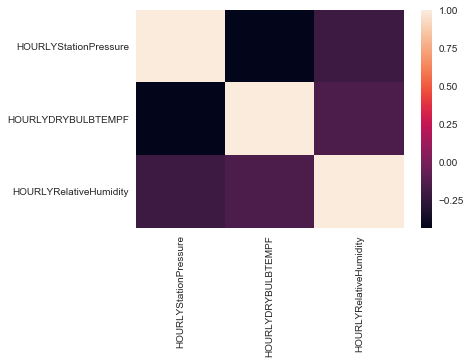

In [8]:
# Check the independence with the independent variables
import seaborn as sb
from pandas import DataFrame
sb.set(style = "white")
sb.set(style = "whitegrid", color_codes = True)
xcols = cols - set(['HOURLYPrecip'])
sb.heatmap(rainPredict[list(xcols)].corr())
plt.show()

In [9]:
# y = dependent varaible ; X = independent variables
y = rainPredict['HOURLYPrecip'].values
X = rainPredict[list(xcols)].values
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/Kevin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
lr_cls = LogisticRegression(solver = 'lbfgs')
lr_cls.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# cv =5 -> 5-fold CV
scores = cross_val_score(lr_cls, X, y, cv = 5 )
scores

array([0.85027581, 0.82943495, 0.839159  , 0.839159  , 0.85282523])

In [12]:
print("Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), (scores.std()/np.sqrt(len(scores)))))

Accuracy: 0.84(+/- 0.00)


In [13]:
predictions = cross_val_predict(lr_cls, X, y, cv = 5)
print(sum(y == 'RAIN')) # Here is how many "RAIN" readings we should see
print(sum(predictions == 'RAIN')) # How many do we really see

3246
985


In [14]:
# print the accuracy score
from sklearn.metrics import *
print("Accuracy: %0.3f" %accuracy_score(y, predictions))

Accuracy: 0.842


In [15]:
# print balanced the two class
#from sklearn.metrics import balanced_accuracy_score
#print("Balanced Accuracy: %0.3f" %balanced_accuracy_score(y, predictions))

In [16]:
# Comparing the true and predicted response value
# print the first 25 true and predicted responses
print ('True:' , y_test[0:20])
print ('Pred:', predictions[0:20])

True: ['NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'RAIN' 'NONE'
 'NONE' 'RAIN' 'NONE' 'NONE' 'NONE' 'RAIN' 'NONE' 'RAIN' 'RAIN' 'NONE']
Pred: ['NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE'
 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE']


In [17]:
print(classification_report(y, predictions))

             precision    recall  f1-score   support

       NONE       0.85      0.98      0.91     15781
       RAIN       0.62      0.19      0.29      3246

avg / total       0.81      0.84      0.81     19027



In [18]:
# print t he first 10 predicted responses
lr_cls.predict(X_test)[0:10]

array(['NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'NONE'], dtype=object)

In [19]:
# Convert NONE and RAIN to 0/1  then predict probabilities from the model
y_numeric = (y == "RAIN").astype(int)
# Predict probabilities from the logistic model
probabilities = cross_val_predict(lr_cls, X, y, cv = 5, method = "predict_proba")
print(probabilities)

[[0.78133341 0.21866659]
 [0.81998837 0.18001163]
 [0.78099175 0.21900825]
 ...
 [0.99253241 0.00746759]
 [0.99151109 0.00848891]
 [0.98721264 0.01278736]]


In [20]:
# convert to single-dimensional array by taking only the second column (the probability of "RAIN")
#[:,1] = all rows, second columns
probabilities = probabilities[:,1]
print(probabilities[1:10])

[0.18001163 0.21900825 0.3292353  0.33083901 0.33186388 0.40609186
 0.21845188 0.1787589  0.09455719]


Text(0,0.5,'Frequency')

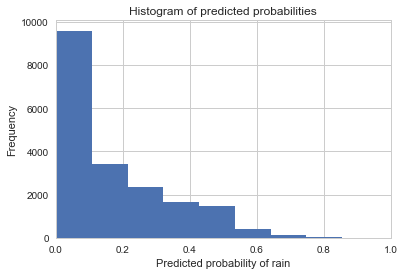

In [21]:
# histogram of predicted probabilities
plt.hist(probabilities, bins = 8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of rain')
plt.ylabel('Frequency')

In [22]:
f1_score(y_numeric, probabilities.round())

0.2902387142519499

In [23]:
roc_auc_score(y_numeric, probabilities)

0.8168847354323736

In [24]:
precision_score(y_numeric, probabilities.round())

0.6233502538071066

In [25]:
recall_score(y_numeric, probabilities.round())

0.1891558841651263

In [26]:
log_loss(y_numeric, probabilities)

0.3629273438749931

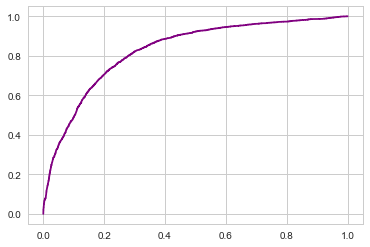

In [27]:
lr_cls.fit(X,y)
probs_linear = lr_cls.predict_proba(X)
preds_linear = probs_linear[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_numeric, preds_linear)
roc_auc = metrics.auc(fpr, tpr)
linearplot = plt.plot(fpr, tpr, 'b', label = "linear" 'auc = %0.2f' %roc_auc, color = 'purple')

Multi-Layer Perceptron

In [28]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the raining data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
# Apply the transformations to the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# 19027 data points with 3 features and 1 label column
rainPredict.shape

(19027, 4)

In [32]:
# Training the model 
from sklearn.neural_network import MLPClassifier
# 3 layers with the same number of neurons as there are features in our data set along with 500 max iterations
mlp = MLPClassifier(hidden_layer_sizes = (3, 3, 3), max_iter = 500)

In [33]:
# Fit the training data to our model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 3, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
# cv =5 -> 5-fold CV
scores = cross_val_score(mlp, X, y, cv = 5 )
scores

array([0.83004991, 0.82943495, 0.82785808, 0.82943495, 0.82943495])

In [35]:
print("Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), (scores.std()/np.sqrt(len(scores)))))

Accuracy: 0.83(+/- 0.00)


In [36]:
predictions = cross_val_predict(mlp, X, y, cv = 5)
print(sum(y == 'RAIN')) # Here is how many "RAIN" readings we should see
print(sum(predictions == 'RAIN')) # How many do we really see

3246
1005


In [37]:
# print the accuracy score
print("Accuracy: %0.3f" %accuracy_score(y, predictions))

Accuracy: 0.822


In [38]:
# print balanced the two class
#print("Balanced Accuracy: %0.3f" %balanced_accuracy_score(y, predictions))

In [39]:
# Comparing the true and predicted response value
# print the first 25 true and predicted responses
print ('True:' , y_test[0:20])
print ('Pred:', predictions[0:20])

True: ['NONE' 'NONE' 'NONE' 'RAIN' 'NONE' 'NONE' 'RAIN' 'NONE' 'NONE' 'NONE'
 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE']
Pred: ['NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE'
 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE']


In [40]:
# Get predictions
predictions = mlp.predict(X_test)

In [41]:
# Built in metrics such as a classification report and confusion matrix to evaluate how well our model performed
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[3802  166]
 [ 532  257]]


In [42]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

       NONE       0.88      0.96      0.92      3968
       RAIN       0.61      0.33      0.42       789

avg / total       0.83      0.85      0.83      4757



In [43]:
# print t he first 10 predicted responses
mlp.predict(X_test)[0:10]

array(['NONE', 'NONE', 'NONE', 'NONE', 'RAIN', 'RAIN', 'NONE', 'NONE',
       'NONE', 'NONE'], dtype='<U4')

In [44]:
# Convert NONE and RAIN to 0/1  then predict probabilities from the model
y_numeric = (y == "RAIN").astype(int)
# Predict probabilities from the logistic model
probabilities = cross_val_predict(mlp, X, y, cv = 5, method = "predict_proba")
print(probabilities)

[[0.77257913 0.22742087]
 [0.8129452  0.1870548 ]
 [0.77204971 0.22795029]
 ...
 [0.97379605 0.02620395]
 [0.96954396 0.03045604]
 [0.95550726 0.04449274]]


In [45]:
# convert to single-dimensional array by taking only the second column (the probability of "RAIN")
#[:,1] = all rows, second columns
probabilities = probabilities[:,1]
print(probabilities[1:10])

[0.1870548  0.22795029 0.34309559 0.34477528 0.34595712 0.41061478
 0.22770003 0.18616596 0.09769166]


Text(0,0.5,'Frequency')

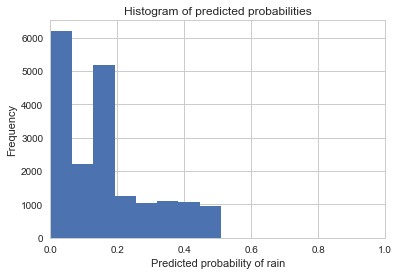

In [46]:
# histogram of predicted probabilities
plt.hist(probabilities, bins = 8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of rain')
plt.ylabel('Frequency')

In [47]:
f1_score(y_numeric, probabilities.round())

0.14151183507253753

In [48]:
roc_auc_score(y_numeric, probabilities)

0.7801158946880873

In [49]:
precision_score(y_numeric, probabilities.round())

0.40702781844802344

In [50]:
recall_score(y_numeric, probabilities.round())

0.08564386937769562

In [51]:
log_loss(y_numeric, probabilities)

0.3861585946040857

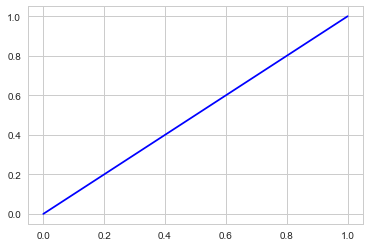

In [52]:
probs_mlp = mlp.predict_proba(X)
preds_mlp = probs_mlp[:,1]
fpr_mlp, tpr_mlp, threshold = metrics.roc_curve(y_numeric, preds_mlp)
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)
mlpplot = plt.plot(fpr_mlp, tpr_mlp, label = "MLP" ' auc = %0.2f' %roc_auc_mlp, color = 'blue')

In [53]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
from sklearn.svm import SVC
svclassifier = SVC(gamma = 'auto', probability = True)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
# cv =5 -> 5-fold CV
scores = cross_val_score(svclassifier, X, y, cv = 5 )
scores

array([0.83425269, 0.8218134 , 0.82417871, 0.80289093, 0.81103811])

In [56]:
print("Accuracy: %0.2f(+/- %0.2f)" %(scores.mean(), (scores.std()/np.sqrt(len(scores)))))

Accuracy: 0.82(+/- 0.00)


In [57]:
predictions = cross_val_predict(svclassifier, X, y, cv = 5)
print(sum(y == 'RAIN')) # Here is how many "RAIN" readings we should see
print(sum(predictions == 'RAIN')) # How many do we really see

3246
1059


In [58]:
# print the accuracy score
print("Accuracy: %0.3f" %accuracy_score(y, predictions))

Accuracy: 0.819


In [59]:
# print balanced the two class
#print("Balanced Accuracy: %0.3f" %balanced_accuracy_score(y, predictions))

In [60]:
# Comparing the true and predicted response value
# print the first 25 true and predicted responses
print ('True:' , y_test[0:20])
print ('Pred:', predictions[0:20])

True: ['RAIN' 'RAIN' 'RAIN' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'RAIN'
 'NONE' 'NONE' 'NONE' 'RAIN' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE']
Pred: ['NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE'
 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE' 'NONE']


In [61]:
# Get predictions
predictions = svclassifier.predict(X_test)

In [62]:
# Evaluating the algorithm-finding the metrics
print(confusion_matrix(y_test, predictions))

[[3814  127]
 [ 588  228]]


In [63]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

       NONE       0.87      0.97      0.91      3941
       RAIN       0.64      0.28      0.39       816

avg / total       0.83      0.85      0.82      4757



In [64]:
# print t he first 10 predicted responses
svclassifier.predict(X_test)[0:10]

array(['RAIN', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE', 'NONE',
       'NONE', 'RAIN'], dtype=object)

In [65]:
# Convert NONE and RAIN to 0/1  then predict probabilities from the model
y_numeric = (y == "RAIN").astype(int)
# Predict probabilities from the logistic model
probabilities = cross_val_predict(lr_cls, X, y, cv = 5, method = "predict_proba")
print(probabilities)

[[0.78133341 0.21866659]
 [0.81998837 0.18001163]
 [0.78099175 0.21900825]
 ...
 [0.99253241 0.00746759]
 [0.99151109 0.00848891]
 [0.98721264 0.01278736]]


In [66]:
# convert to single-dimensional array by taking only the second column (the probability of "RAIN")
#[:,1] = all rows, second columns
probabilities = probabilities[:,1]
print(probabilities[1:20])

[0.18001163 0.21900825 0.3292353  0.33083901 0.33186388 0.40609186
 0.21845188 0.1787589  0.09455719 0.03518614 0.02387014 0.03531824
 0.02048814 0.02050076 0.02585593 0.024084   0.11941157 0.14789564
 0.28209935]


Text(0,0.5,'Frequency')

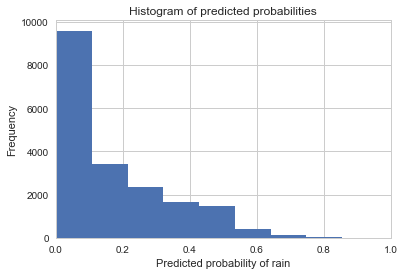

In [67]:
# histogram of predicted probabilities
plt.hist(probabilities, bins = 8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of rain')
plt.ylabel('Frequency')

In [68]:
f1_score(y_numeric, probabilities.round())

0.2902387142519499

In [69]:
roc_auc_score(y_numeric, probabilities)

0.8168847354323736

In [70]:
precision_score(y_numeric, probabilities.round())

0.6233502538071066

In [71]:
recall_score(y_numeric, probabilities.round())

0.1891558841651263

In [72]:
log_loss(y_numeric, probabilities)

0.3629273438749931

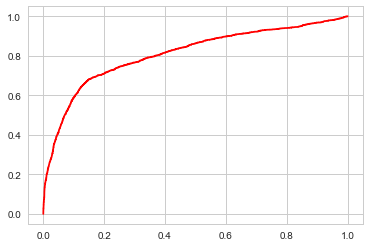

In [73]:
probs_svm = svclassifier.predict_proba(X)
preds_svm = probs_svm[:,1]
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_numeric, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
svmplot = plt.plot(fpr_svm, tpr_svm, label = "SVM" 'auc = %0.2f' %roc_auc_svm, color = "red")

ROC Curves

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

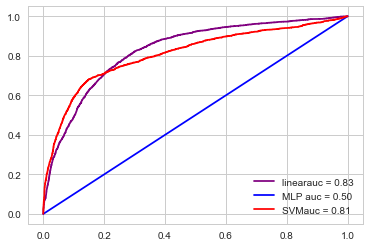

In [75]:
lr_cls.fit(X,y)
probs_linear = lr_cls.predict_proba(X)
preds_linear = probs_linear[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_numeric, preds_linear)
roc_auc = metrics.auc(fpr, tpr)
linearplot = plt.plot(fpr, tpr, 'b', label = "linear" 'auc = %0.2f' %roc_auc, color = 'purple')
probs_mlp = mlp.predict_proba(X)
preds_mlp = probs_mlp[:,1]
fpr_mlp, tpr_mlp, threshold = metrics.roc_curve(y_numeric, preds_mlp)
roc_auc_mlp = metrics.auc(fpr_mlp, tpr_mlp)
mlpplot = plt.plot(fpr_mlp, tpr_mlp, label = "MLP" ' auc = %0.2f' %roc_auc_mlp, color = 'blue')
probs_svm = svclassifier.predict_proba(X)
preds_svm = probs_svm[:,1]
fpr_svm, tpr_svm, threshold = metrics.roc_curve(y_numeric, preds_svm)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
svmplot = plt.plot(fpr_svm, tpr_svm, label = "SVM" 'auc = %0.2f' %roc_auc_svm, color = "red")
plt.legend(loc = "lower right")
plt.show()